# Visualization of the min-max objective for boosted stumps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
seaborn.set(font_scale=1.65)
seaborn.set_style("white")


54.88954404578718 210.94100026063305 1810.0989095555713
[   0.           27.42514634   54.85029267   82.27543901  109.70058534
  137.12573168  164.55087802  191.97602435  219.40117069  246.82631702
  274.25146336  301.6766097   329.10175603  356.52690237  383.95204871
  411.37719504  438.80234138  466.22748771  493.65263405  521.07778039
  548.50292672  575.92807306  603.35321939  630.77836573  658.20351207
  685.6286584   713.05380474  740.47895107  767.90409741  795.32924375
  822.75439008  850.17953642  877.60468275  905.02982909  932.45497543
  959.88012176  987.3052681  1014.73041444 1042.15556077 1069.58070711
 1097.00585344 1124.43099978 1151.85614612 1179.28129245 1206.70643879
 1234.13158512 1261.55673146 1288.9818778  1316.40702413 1343.83217047
 1371.2573168  1398.68246314 1426.10760948 1453.53275581 1480.95790215
 1508.38304848 1535.80819482 1563.23334116 1590.65848749 1618.08363383
 1645.50878017 1672.9339265  1700.35907284 1727.78421917 1755.20936551]


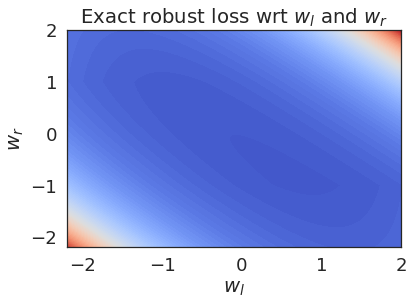

In [223]:
def f(w_l, w_r):
    """
    Note: the values that we select for y, G_k_sum, h_r, h_l are arbitrary. 
    This plot aims to show the qualitative behaviour of the objective that we optimize.
    """
    y = np.array([-1, 1, 1, -1, 1])
    # This is the joint contribution of the previous weak learners
    G_k_sum_y_wl = np.array([4.5, -1.0, 2.0, -0.5, 3.0])
    h_r = np.array([2.0, -2.0, 5.0, -3.0, -1.0])
    h_l = np.array([5.0, -1.0, -3.5, -2.0, -4.0])  

    margin = G_k_sum_y_wl + y*w_l + np.minimum(h_l, h_r + y*w_r)
    losses = np.exp(-margin)
    obj = np.sum(losses)
    log_obj = obj
    return log_obj

np.random.seed(1)
plot_name = 'minmax_objective_stumps'

grid_size = 200
min_val, max_val = -2.2, 2.0
XX, YY = np.meshgrid(np.linspace(min_val, max_val, grid_size), 
                     np.linspace(min_val, max_val, grid_size))
X0 = np.stack([np.ravel(XX), np.ravel(YY)]).T
f_vals = np.zeros(X0.shape[0])
for i in range(len(f_vals)):
    f_vals[i] = f(X0[i, 0], X0[i, 1])
# For color adjustment
# f_vals = f_vals / 1000
# f_vals = np.clip(f_vals, f_vals.min(), f_vals.max()*0.75)
ZZ = f_vals.reshape(grid_size, grid_size)

# f_vals = np.clip(f_vals, f_vals.min(), f_vals.max()/3)
# f_vals = f_vals / 5
print(f_vals.min(), f_vals.mean(), f_vals.max())

ax = plt.gca()
# countour_vals = np.linspace(f_vals.min(), f_vals.max(), 60)
countour_vals = np.linspace(0, f_vals.max() - f_vals.min(), 65)
# countour_vals2 = np.linspace(f_vals.mean()+1, f_vals.max(), 5)
# countour_vals = np.hstack([countour_vals1, countour_vals2])
print(countour_vals)
plt.contourf(XX, YY, ZZ, cmap="coolwarm", vmin=0, vmax=f_vals.max(), 
             levels=90)
axis_margin = 0.0
ax.set_xlim([min_val-axis_margin, max_val+axis_margin])
ax.set_ylim([min_val-axis_margin, max_val+axis_margin])

# ticks = [-5, -3, -1, 1, 3, 5]
ticks = [-2, -1, 0, 1, 2]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel('$w_l$')
ax.set_ylabel('$w_r$')
ax.set_title('Exact robust loss wrt $w_l$ and $w_r$')#, fontsize=15)
    
plt.savefig('../plots/{}.pdf'.format(plot_name), bbox_inches='tight')


